# Pillow 를 이용해서 파이썬 이미지 다루기기

In [1]:
!pip install pillow

!wget -O cat.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgnL-6fb5PhgkCkH3odiqgPmhqoWm6HeRjwQ&usqp=CAU
!wget -O dog.jpg https://static01.nyt.com/images/2022/05/10/science/28DOGS-BEHAVIOR1/28DOGS-BEHAVIOR1-mediumSquareAt3X-v2.jpg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-12-20 11:29:04--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSgnL-6fb5PhgkCkH3odiqgPmhqoWm6HeRjwQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.2.101, 142.251.2.113, 142.251.2.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4537 (4.4K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]   4.43K  --.-KB/s    in 0s      

2022-12-20 11:29:04 (30.4 MB/s) - ‘cat.jpg’ saved [4537/4537]

--2022-12-20 11:29:04--  https://static01.nyt.com/images/2022/05/10/science/28DOGS-BEHAVIOR1/28DOGS-BEHAVIOR1-mediumSquareAt3X-v2.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.


In [2]:
from PIL import Image

In [3]:
cat = Image.open("cat.jpg")
dog = Image.open("dog.jpg")

display(cat)
display(dog)

Output hidden; open in https://colab.research.google.com to view.

## 이미지 형식 확인인

In [4]:
def show_image_info(img):
  print("형식 ", img.format)
  print("크기 ", img.size)
  print("모드 ", img.mode)

show_image_info(cat)
show_image_info(dog)

형식  JPEG
크기  (252, 200)
모드  RGB
형식  JPEG
크기  (1800, 1800)
모드  RGB


## 이미지 편집

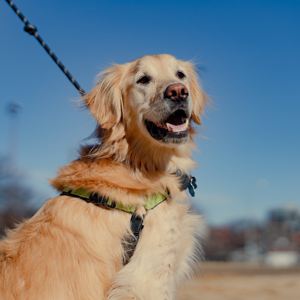

In [5]:
dog = dog.resize((300, 300))

display(dog)

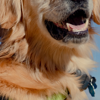

In [6]:
dog_crop = dog.crop((100, 100, 200, 200))
display(dog_crop)

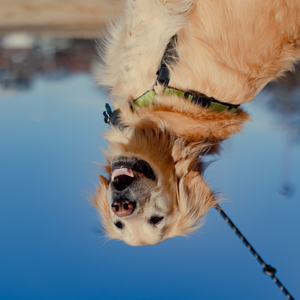

In [7]:
display(dog.rotate(180))

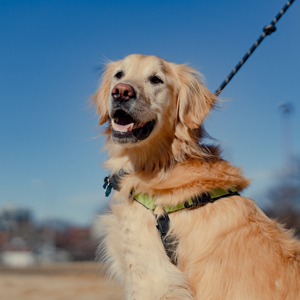

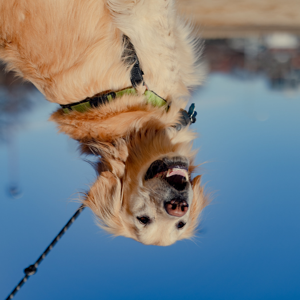

In [8]:
display(dog.transpose(Image.FLIP_LEFT_RIGHT))
display(dog.transpose(Image.FLIP_TOP_BOTTOM))

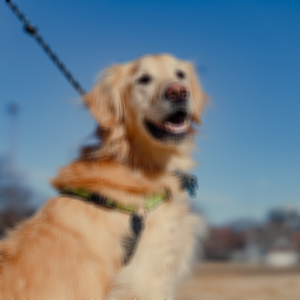

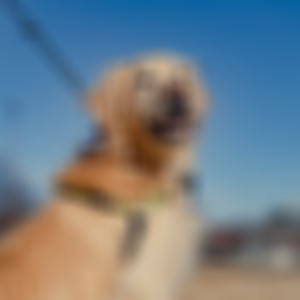

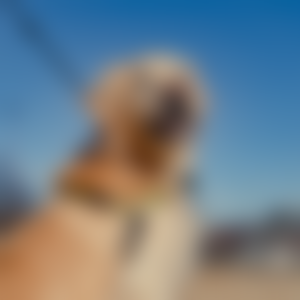

In [9]:
from PIL import ImageFilter

display(dog.filter(ImageFilter.BLUR))
display(dog.filter(ImageFilter.BoxBlur(10)))
display(dog.filter(ImageFilter.GaussianBlur(10)))

## 이미지 만들어서 그리기

In [10]:
from PIL import ImageDraw

canvas = Image.new(mode="RGB", size = (400, 400))
draw = ImageDraw.Draw(canvas)

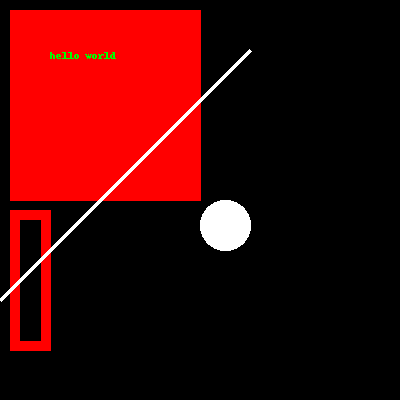

In [11]:
color = (255, 0, 0)
draw.rectangle((10, 10, 200 ,200), fill=color, width=2)
draw.rectangle((10, 210, 50 ,350), outline=color, width=10)
draw.text((50, 50,),"hello world", fill=(0,255,0))
draw.line((250, 50, 0 ,300), fill = (255, 255, 255), width=5)
draw.ellipse((200, 200, 250, 250), fill=(255,255,255))
display(canvas)

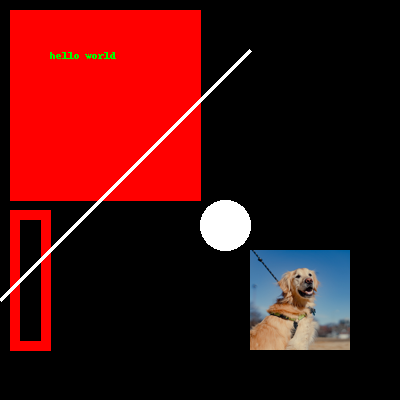

In [12]:

canvas.paste(dog.resize((100, 100)), (250, 250))
display(canvas)

In [13]:
dog_canvas = dog.copy()
draw = ImageDraw.Draw(dog_canvas, "RGBA")

In [14]:
(0,0) + dog_canvas.size

(0, 0, 300, 300)

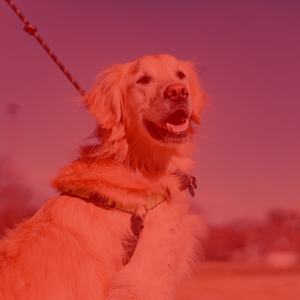

In [15]:
draw.rectangle((0,0) + dog_canvas.size, fill=(255,0,0,128))
display(dog_canvas)

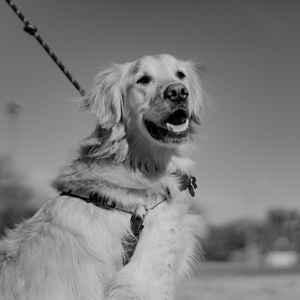

In [16]:
display(dog.convert("L"))

In [17]:
canvas.save("canvas.jpg")

In [20]:
import os

for file in os.listdir("."):
  if not file.endswith(".jpg"):
    continue
  image = Image.open(file)
  image = image.resize((200, 200))
  image.save("resized-"+file)